### Puxar base de dados

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Informações Gerais

In [6]:
tabela = pd.read_csv("exportacoes_franca.csv")
tabela = tabela.loc[tabela["Economic Block"] == "Europe", :]
display(tabela)
cidade_qtds = tabela['City'].value_counts()
produto_qtds = tabela['SH2 Description'].value_counts()
print(cidade_qtds)
print(produto_qtds)

exportation_year = tabela.groupby("Year",).sum()
exportation_year = exportation_year[["US$ FOB"]]


,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
6,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,47828,28306
8,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",Europe,391,22
...,...,...,...,...,...,...,...,...,...,...,...
142350,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,Europe,136,0
142352,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",Europe,76,50
142354,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",Europe,2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400


City
São Paulo - SP              4317
Sorocaba - SP               4276
Taubaté - SP                3906
São José dos Campos - SP    3268
Jundiaí - SP                2618
                            ... 
Cabedelo - PB                  1
São Lourenço - MG              1
Lambari - MG                   1
Pintadas - BA                  1
Passa Tempo - MG               1
Name: count, Length: 972, dtype: int64
SH2 Description
Nuclear reactors, boilers, machinery and mechanical appliances; others                  9866
Electrical machinery and equipment and parts thereof; others                            8089
Optical, photographic, cinematographic instruments; others                              4074
Articles of iron or steel                                                               4051
Wood and articles of wood; wood charcoal                                                3819
                                                                                        ... 
Vegetable plaiting 

### Como foi a evolução das exportações para a frança ao longo dos anos?

In [7]:
# Filtra apenas os anos desejados
anos = [2016, 2017, 2018, 2019, 2020]
df_franca_filtrado = tabela[tabela['Year'].isin(anos)]

# Agrupa por ano e soma o valor FOB (exportações)
evolucao_exportacoes = df_franca_filtrado.groupby('Year')['US$ FOB'].sum().reset_index()

# Formata os valores em milhões de dólares
evolucao_exportacoes['US$ FOB (milhões)'] = evolucao_exportacoes['US$ FOB'] / 1_000_000

# Mostra a tabela final
display(evolucao_exportacoes[['Year', 'US$ FOB (milhões)']])


# Outra forma de fazer a mesma coisa
# Agrupa por ano e soma o valor FOB (exportações)
tabela_anos_exportacoes = tabela[["Year", "US$ FOB" ]].groupby("Year").sum().reset_index()
def formatar(valor):
    valor_formatado = f"US$ {valor:,} milhões"
    return valor_formatado
tabela_anos_exportacoes["US$ FOB"] = tabela_anos_exportacoes["US$ FOB"].apply(formatar)

display(tabela_anos_exportacoes)

,Year,US$ FOB (milhões)
0,2016,2307.750041
1,2017,2224.352728
2,2018,2619.712208
3,2019,2609.361806
4,2020,1983.797405


,Year,US$ FOB
0,2016,"US$ 2,307,750,041 milhões"
1,2017,"US$ 2,224,352,728 milhões"
2,2018,"US$ 2,619,712,208 milhões"
3,2019,"US$ 2,609,361,806 milhões"
4,2020,"US$ 1,983,797,405 milhões"


Gerando um Gráfico

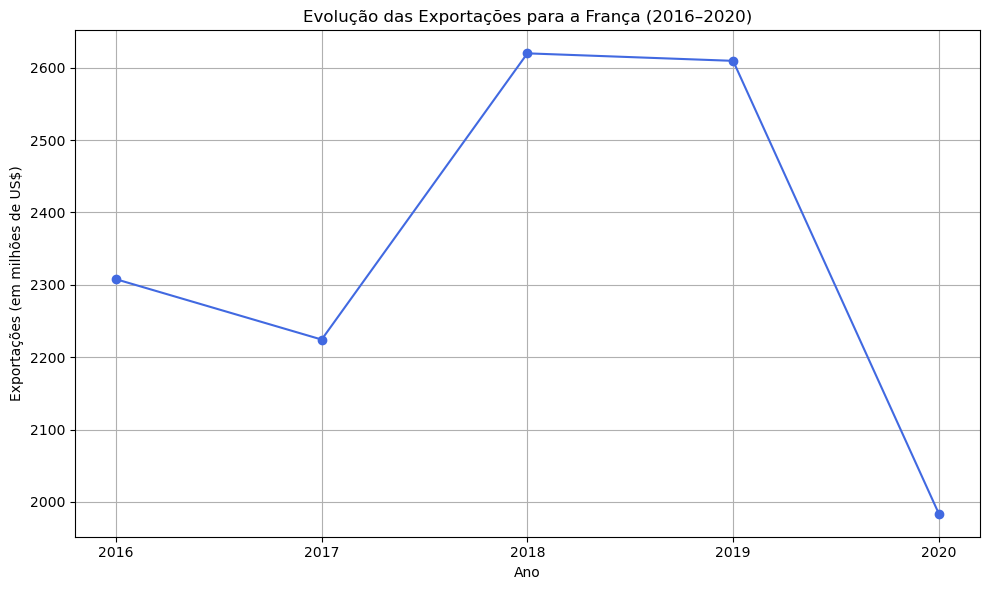

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o DataFrame já foi filtrado como no primeiro bloco:
# df_franca -> já contém apenas dados da França

# Filtra os anos desejados
anos = [2016, 2017, 2018, 2019, 2020]
df_franca_filtrado = tabela[tabela['Year'].isin(anos)]

# Agrupa e soma as exportações por ano
evolucao = df_franca_filtrado.groupby('Year')['US$ FOB'].sum().reset_index()
evolucao['US$ FOB (milhões)'] = evolucao['US$ FOB'] / 1_000_000

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(evolucao['Year'], evolucao['US$ FOB (milhões)'], marker='o', linestyle='-', color='royalblue')
plt.title('Evolução das Exportações para a França (2016–2020)')
plt.xlabel('Ano')
plt.ylabel('Exportações (em milhões de US$)')
plt.grid(True)
plt.xticks(anos)
plt.tight_layout()
plt.show()


### Quais os produtos mais exportados ao longo de todo o período?

In [8]:
exportation_produto = tabela.groupby("SH4 Description",).sum()
exportation_produto = exportation_produto[["US$ FOB"]]
exportation_produto = exportation_produto.sort_values('US$ FOB', ascending=False)
exportation_produto["US$ FOB"] = exportation_produto["US$ FOB"].map(formatar)

display(exportation_produto)

,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","US$ 2,814,212,320 milhões"
"Iron ores and concentrates, including roasted iron pyrites","US$ 1,632,140,244 milhões"
"Chemical wood pulp, soda or sulphate, other than dissolving grades","US$ 922,712,342 milhões"
"Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion","US$ 536,277,376 milhões"
"Other aircraft (for example, helicopters, aeroplanes); spacecraft (including satellites) and suborbital and spacecraft launch vehicles","US$ 342,566,535 milhões"
...,...
Anti-freezing preparations and prepared de-icing fluids,US$ 5 milhões
"Man-made filament yarn (other than sewing thread), put up for retail sale",US$ 5 milhões
"Glass envelopes (including bulbs and tubes), open, and glass parts thereof, without fittings, for electric lamps, cathode-ray tubes or the like",US$ 4 milhões


### Em 2020 qual cidade mais exportou para a França?

In [9]:
tabela_2020 = tabela.loc[tabela["Year"] == 2020, :]
exportation_cidade = tabela_2020.groupby("City",).sum()[["US$ FOB"]]

exportation_cidade = exportation_cidade.sort_values('US$ FOB', ascending=False)
exportation_cidade["US$ FOB"] = exportation_cidade["US$ FOB"].map(formatar)

display(exportation_cidade)

,US$ FOB
City,
Duque de Caxias - RJ,"US$ 139,702,798 milhões"
Luís Eduardo Magalhães - BA,"US$ 132,664,066 milhões"
Ponta Grossa - PR,"US$ 93,888,508 milhões"
São José dos Campos - SP,"US$ 86,469,638 milhões"
Rio de Janeiro - RJ,"US$ 61,261,107 milhões"
...,...
Não-Me-Toque - RS,US$ 21 milhões
Cubatão - SP,US$ 20 milhões
Holambra - SP,US$ 5 milhões


### O que as 2 maiores cidades exportaram tanto?

In [10]:
#Duque de Caxias - RS
tabela_cidade = tabela_2020.loc[tabela_2020["City"] == "Duque de Caxias - RJ", :]
tabela_cidade = tabela_cidade.groupby("SH4 Description",).sum()[["US$ FOB"]]
tabela_cidade = tabela_cidade.sort_values('US$ FOB', ascending=False)
tabela_cidade["US$ FOB"] = tabela_cidade["US$ FOB"].map(formatar)
display(tabela_cidade)

#Luís Eduardo Magalhães - BA
tabela_cidade = tabela_2020.loc[tabela_2020["City"] == "Luís Eduardo Magalhães - BA", :]
tabela_cidade = tabela_cidade.groupby("SH4 Description",).sum()[["US$ FOB"]]
tabela_cidade = tabela_cidade.sort_values('US$ FOB', ascending=False)
tabela_cidade["US$ FOB"] = tabela_cidade["US$ FOB"].map(formatar)
display(tabela_cidade)

,US$ FOB
SH4 Description,
"Turbo-jets, turbo-propellers and other gas turbines","US$ 82,490,516 milhões"
Crude oil from petroleum and bituminous minerals,"US$ 33,610,511 milhões"
"Transmission shafts (including cam shafts and crank shafts) and cranks; bearing housings and plain shaft bearings; gears and gearing; ball or roller screws; gear boxes and other speed changers, including torque converters; flywheels and pulleys, including","US$ 4,897,696 milhões"
Ball or roller bearings,"US$ 4,123,545 milhões"
"Screws, bolts, nuts, coach screws, screw hooks, rivets, cotters, cotter-pins, washers (including spring washers) and similar articles, of iron or steel","US$ 2,109,423 milhões"
"Soybean oilcake and other solid residue, wh/not ground","US$ 2,007,137 milhões"
Other articles of nickel,"US$ 1,475,623 milhões"
Other articles of iron or steel,"US$ 1,423,564 milhões"
"Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, including pressure-reducing valves and thermostatically controlled valves","US$ 1,028,261 milhões"


,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","US$ 132,649,904 milhões"
"Melons (including watermelons) and papaws (papayas), fresh","US$ 14,162 milhões"
